<a href="https://colab.research.google.com/github/buisonanh/phishing_urls_detection/blob/main/phishing_urls_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prepare Data**

In [2]:
import numpy as np
import pandas as pd

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Import data
legit = pd.read_csv("datasets/FinalDataset/URL/Benign_list_big_final.csv")
phishing = pd.read_csv("datasets/FinalDataset/URL/phishing_dataset.csv")
malware = pd.read_csv("datasets/FinalDataset/URL/Malware_dataset.csv")
spam = pd.read_csv("datasets/FinalDataset/URL/spam_dataset.csv")


In [4]:
legit.columns = ['url']

phishing.columns = ['url']
malware.columns = ['url']
spam.columns = ['url']

malicious = pd.concat([phishing, malware, spam])



In [5]:
# Drop duplicates
legit.drop_duplicates()
malicious.drop_duplicates()

print(legit.shape)
print(malicious.shape)
print()

# Check null values
print(f"Legit null values: {legit.isnull().sum()}")
print(f"Phishing null values: {malicious.isnull().sum()}")

(35377, 1)
(33528, 1)

Legit null values: url    0
dtype: int64
Phishing null values: url    0
dtype: int64


In [6]:
# add a 'label' column to the dataframes
legit["label"] = 0
malicious["label"] = 1

print(legit)
# combine the two dataframes
df = pd.concat([legit, malicious], ignore_index=True)

# shuffle the dataframe's rows randomly
df = df.sample(frac=1, random_state=42) # Set random_state to an integer for reproducibility

                                                     url  label
0      http://1337x.to/torrent/1110018/Blackhat-2015-...      0
1      http://1337x.to/torrent/1122940/Blackhat-2015-...      0
2      http://1337x.to/torrent/1124395/Fast-and-Furio...      0
3      http://1337x.to/torrent/1145504/Avengers-Age-o...      0
4      http://1337x.to/torrent/1160078/Avengers-age-o...      0
...                                                  ...    ...
35372  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35373  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35374  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35375  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35376  https://asana.com/guide/videos/%22//fast.wisti...      0

[35377 rows x 2 columns]


In [7]:
# Identify duplicate rows
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicates: {num_duplicates}")

df = df.drop_duplicates()

duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicates: {num_duplicates}")


Number of duplicates: 8962


Number of duplicates: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59943 entries, 38874 to 15795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     59943 non-null  object
 1   label   59943 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [9]:
print(df.isnull().sum())
df.dropna(inplace = True)

df.head(10)

url      0
label    0
dtype: int64


,url,label
38874,http://www.dongyuwl.com/images/?ref=http%3A%2F...,1
32003,http://web.de/magazine/sport/fussball/champion...,0
24710,http://akhbarelyom.com/news/newdetails/411482/...,0
19366,http://nypost.com/2015/05/13/suspect-in-brazen...,0
40527,http://davemenkehorst.com/wp-content/uploads/2...,1
1836,https://prezi.com/ytniorzhkciw/mrs-sporty-inte...,0
64392,http://acard4u.co.uk/product_reviews.php?produ...,1
21144,http://lifehacker.com/5813835/from-the-tips-bo...,0
48579,http://9779.info/%E6%9C%89%E5%85%B3%E7%BA%B8%E...,1
63957,http://aolshop.memberoffers.co.uk/csp/smp/aol/...,1


In [10]:
"""
# assume `data` is a pandas DataFrame with columns "url" and "label"
counts = df["label"].value_counts()

# print the counts for each category
print(counts)
"""

'\n# assume `data` is a pandas DataFrame with columns "url" and "label"\ncounts = df["label"].value_counts()\n\n# print the counts for each category\nprint(counts)\n'

In [11]:
df.isnull().sum()
df.isna().sum()

url      0
label    0
dtype: int64

In [12]:
# delete symbols
import re
#df["url"] = df["url"].apply(lambda x: re.sub('[/\.;?=https:\']', ' ', x))

In [13]:
df['url'] = df['url'].str.replace('www.', '')

C:\Users\PC\AppData\Local\Temp\ipykernel_3756\2858792793.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['url'] = df['url'].str.replace('www.', '')


# **Vectorizing and Encoding**

In [14]:
# Data selection
url_df = df['url']
label_df = df['label']

In [15]:
# Transform data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

import scipy.sparse as sp

# Vectorize URLs
vectorizer = CountVectorizer()
url_vec = vectorizer.fit_transform(url_df)


# Encode label column
label_arr = np.asarray(label_df)



In [16]:
"""
from imblearn.over_sampling import RandomOverSampler

# create a RandomOverSampler object and fit it to the data
oversampler = RandomOverSampler(random_state=42)
combined_features_arr_balanced, label_arr_balanced = oversampler.fit_resample(combined_features_arr, label_arr)

# check the new class distribution
pd.Series(label_arr_balanced).value_counts()
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n\n# create a RandomOverSampler object and fit it to the data\noversampler = RandomOverSampler(random_state=42)\ncombined_features_arr_balanced, label_arr_balanced = oversampler.fit_resample(combined_features_arr, label_arr)\n\n# check the new class distribution\npd.Series(label_arr_balanced).value_counts()\n'

# **Logistic Regression**

In [17]:
# chia tap train, test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(url_vec, label_arr, test_size=0.25, random_state=42)

print('Train: ', x_train.shape[0])
print('Test: ', x_test.shape[0])

Train:  44957
Test:  14986


In [18]:

# modeling lbfgs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C= 0.01, class_weight= None, max_iter= 100, penalty= 'l2',random_state=42)
lr_lbfgs = logreg.fit(x_train,y_train)


In [19]:
"""
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'max_iter': [100, 500, 1000],
              'class_weight': [None, 'balanced']}

grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
"""

# Output:
# Best parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2'}
# Best cross-validation score: 0.9956939638358084


'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\'C\': [0.001, 0.01, 0.1, 1, 10],\n              \'penalty\': [\'l1\', \'l2\'],\n              \'max_iter\': [100, 500, 1000],\n              \'class_weight\': [None, \'balanced\']}\n\ngrid_search = GridSearchCV(LogisticRegression(solver=\'lbfgs\'),\n                           param_grid,\n                           cv=5,\n                           scoring=\'accuracy\',\n                           n_jobs=-1)\n\ngrid_search.fit(x_train, y_train)\n\nprint(f"Best parameters: {grid_search.best_params_}")\nprint(f"Best cross-validation score: {grid_search.best_score_}")\n'

In [20]:
x_test

<14986x84132 sparse matrix of type '<class 'numpy.int64'>'
	with 216050 stored elements in Compressed Sparse Row format>

In [21]:
y_pred=logreg.predict(x_test)
print(y_pred)

[0 0 1 ... 1 0 1]


In [22]:
from sklearn.metrics import jaccard_score
print(f"Jaccard score: {jaccard_score(y_test, y_pred,pos_label=0)}")

Jaccard score: 0.9397113842864778


In [23]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")


Accuracy: 0.96
F1 score: 0.95


In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8791,   82],
       [ 482, 5631]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

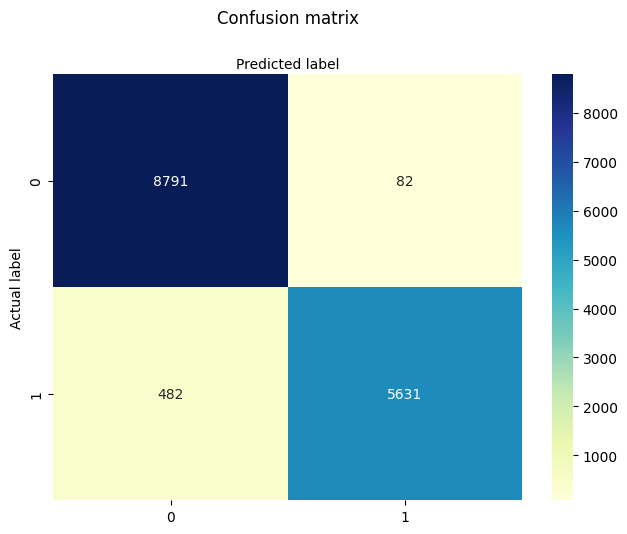

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
"""
new_url = input('Enter an URL to test: ')

# Transform features into same format as training data
new_vector = vectorizer.transform([new_url])

# Make prediction using trained model
prediction = logreg.predict(new_vector)

if prediction[0] == 0:
  print('Legitimate')
else:
  print('Phishing')
"""

"\nnew_url = input('Enter an URL to test: ')\n\n# Transform features into same format as training data\nnew_vector = vectorizer.transform([new_url])\n\n# Make prediction using trained model\nprediction = logreg.predict(new_vector)\n\nif prediction[0] == 0:\n  print('Legitimate')\nelse:\n  print('Phishing')\n"

# **(Test)**

In [27]:
p_test = pd.read_csv("datasets\publish_test.csv")
p_test.head(10)

,x,y,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,http://newmatdesign.ro/wp-admin/wewe/YAHOO/ya....,1,NaN,NaN,NaN
1,http://ca.linkedin.com/directory/people/ca/pou...,0,NaN,NaN,NaN
2,http://www.ccent.com.au/index.php?option=com_m...,1,NaN,NaN,NaN
3,http://applerugs.co.uk/rugs/product_info.php?p...,1,NaN,NaN,NaN
4,http://mo-artworks.com/blog/diverse-videos/ein...,1,NaN,NaN,NaN
5,http://spoke.com/info/pF2WnMN/ZachTrimmer,0,NaN,NaN,NaN
6,http://www.ricardoitalo.com.br/portal/index.ph...,1,NaN,NaN,NaN
7,http://sexshop-bg.biz/products?page=shop.produ...,1,NaN,NaN,NaN
8,http://www.beriva.lt/index.html?di=akcijos&R=1...,1,NaN,NaN,NaN
9,http://ma.facevena.xyz/app/facebook.com/?lang=...,1,NaN,NaN,NaN


In [28]:
test = p_test[['x','y']]

test.isnull().sum()
test.dropna()

indexValue = test[test['y'] == 'continue=to&amp'].index
test.drop(indexValue , inplace=True)

#test["x"] = test["x"].apply(lambda x: re.sub('[/\.;?=https:\']', ' ', x))

test.head(10)

C:\Users\PC\AppData\Local\Temp\ipykernel_3756\3919755653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(indexValue , inplace=True)


,x,y
0,http://newmatdesign.ro/wp-admin/wewe/YAHOO/ya....,1
1,http://ca.linkedin.com/directory/people/ca/pou...,0
2,http://www.ccent.com.au/index.php?option=com_m...,1
3,http://applerugs.co.uk/rugs/product_info.php?p...,1
4,http://mo-artworks.com/blog/diverse-videos/ein...,1
5,http://spoke.com/info/pF2WnMN/ZachTrimmer,0
6,http://www.ricardoitalo.com.br/portal/index.ph...,1
7,http://sexshop-bg.biz/products?page=shop.produ...,1
8,http://www.beriva.lt/index.html?di=akcijos&R=1...,1
9,http://ma.facevena.xyz/app/facebook.com/?lang=...,1


In [29]:
x_t = test['x']
y_t = test['y'].astype(int)


x_t = vectorizer.transform(x_t)
y_t = np.asarray(y_t)
print(y_t)

print()

y_pred_t = logreg.predict(x_t)
print(y_pred_t)

[1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]

[1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1]


In [30]:
logreg.score(x_t, y_t)

0.7070707070707071

In [31]:
from sklearn.metrics import jaccard_score
print(f"Jaccard score: {jaccard_score(y_t, y_pred_t,pos_label=0)}")

Jaccard score: 0.5166666666666667


In [32]:
accuracy = accuracy_score(y_t, y_pred_t)
f1 = f1_score(y_t, y_pred_t)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.71
F1 score: 0.73


Text(0.5, 427.9555555555555, 'Predicted label')

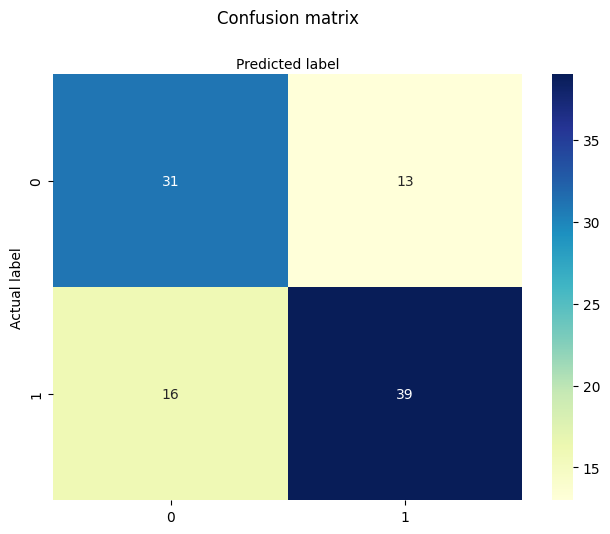

In [33]:
cnf_matrix = metrics.confusion_matrix(y_t, y_pred_t)
cnf_matrix

class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Custom Test

In [34]:
import re

url_test = "https://github.com/buisonanh/phishing-urls-detection"

# Remove "www" from the URL
url_test = re.sub(r'www\.', '', url_test)
url_test = vectorizer.transform([url_test])

result = logreg.predict(url_test)

if result[0] == 0:
    print("Benign")
else:
    print("Malicious")


Benign


# **Save Model**

In [37]:
import pickle

output_file = 'model/model.pkl'

# Save the scikit-learn model
with open(output_file, 'wb') as file:
    pickle.dump(logreg, file)
